In [1]:
import numpy as np
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
boston = datasets.load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['price'] = boston.target
print(bos.shape)

(506, 14)


In [2]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [3]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle = True, random_state=12)

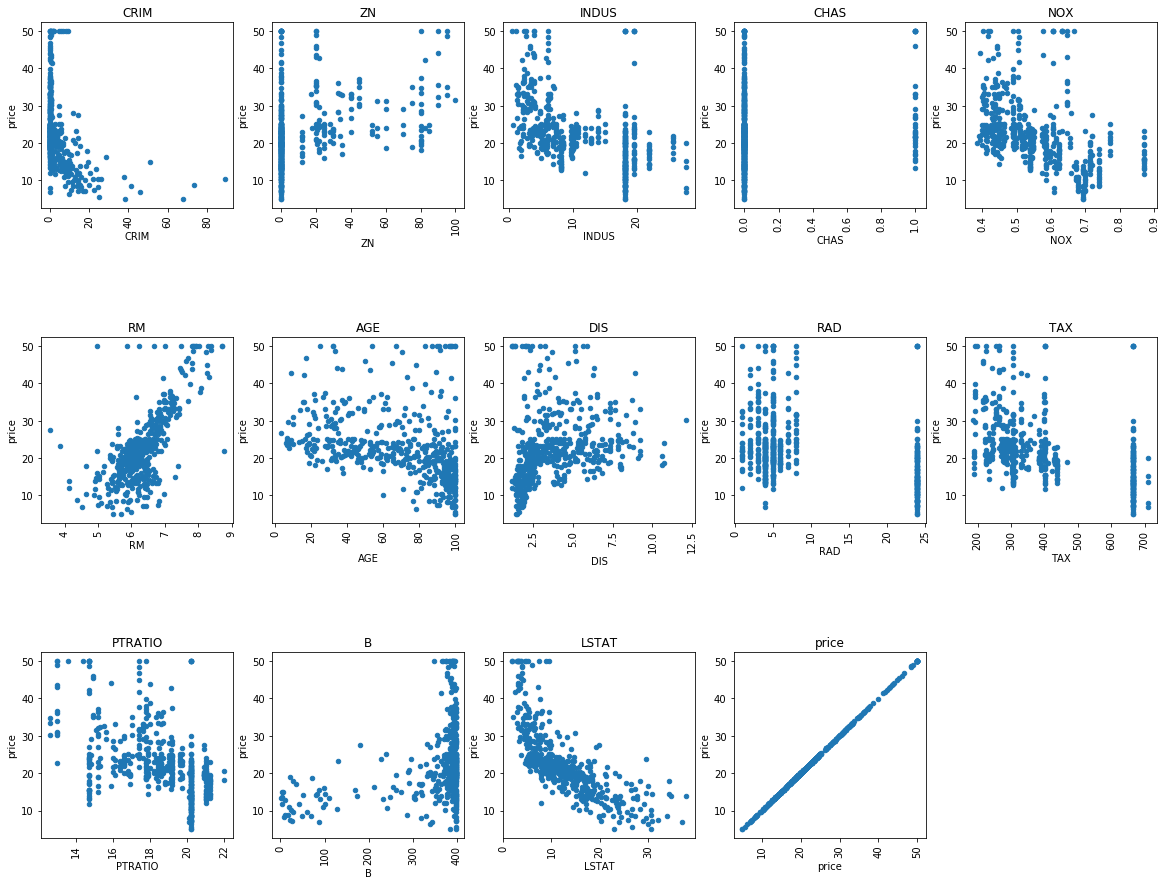

In [6]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(bos.shape[1])/cols)
for i,column in enumerate(bos.columns):
    axs = fig.add_subplot(rows,cols,i+1)
    axs.set_title(column)
    bos.plot(kind='scatter',x = column , y = 'price',ax = axs)
    plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=0.7,wspace=0.2)

In [14]:
y_column = bos['price']

In [15]:
x_column = bos.drop('price',axis=1)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_column,y_column,test_size = 0.3)

In [17]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [18]:
y_pred = model.predict(x_test)

In [22]:
from sklearn import metrics

print('accuracy:',format(metrics.r2_score(y_test,y_pred) * 100 , '.2f' ) , '%' )
print('Mean Squared Error:',format(metrics.mean_squared_error(y_test,y_pred) , '.5f' ))

accuracy: 79.36 %
Mean Squared Error: 18.39250


In [35]:
parameters = { 'min_samples_split':[2,5,10,20,25,30,50],
              'max_depth':[None,2,3,4,5,6,8,9,10],
              'min_samples_leaf' : [1,3,5,7,9,11,13,15],
              'max_features' : ['auto','dqrt','log2'],
              'n_estimators' : [10,30,50,75,100,200]
             }
from sklearn.model_selection import GridSearchCV
              
grid_search = GridSearchCV(RandomForestRegressor(),param_grid = parameters,n_jobs = -1 , verbose = 1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 9072 candidates, totalling 45360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 4852 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 9952 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 12052 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 14352 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 16852 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 19552 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 22452 tasks  

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5, 6, 8, 9, 10],
                         'max_features': ['auto', 'dqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15],
                         'min_samples_split': [2, 5, 10, 20, 25, 30, 50],
                         'n_estimators': [10, 30, 50, 75, 100, 200]},
             verbose=1)

In [36]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 30}

In [39]:
y_pred = grid_search.predict(x_test)
print('test accuracy :', format(metrics.r2_score(y_test,y_pred) * 100, '.2f'),'%')
print('test accuracy :', format(metrics.mean_squared_error(y_test,y_pred), '.5f'))

test accuracy : 76.73 %
test accuracy : 20.73863
